In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import config

In [26]:
estimate_output_path = os.path.join(config.RAW_DIR, "estimate-output")
dfs = []

for f in os.listdir(estimate_output_path):
    if not f.endswith("csv"): continue
    f_path = os.path.join(estimate_output_path, f)
    df = pd.read_csv(f_path, index_col=0)
    dfs.append(df)

In [27]:
concat = pd.concat(dfs, axis=1)
concat = concat.fillna(0)
concat.index = [".".join(ind.split(".")[:-1]) for ind in concat.index]
concat.index = [ind[:-1] if ind[-1] == "0" and "." in ind else ind for ind in concat.index]
concat

,magic_5171_S42_R1_001,magic_2773_S833_R1_001,magic_1112_S360_R1_001,magic_3408_S376_R1_001,magic_4663_S26_R1_001,814_S250_R1_001,magic_1747_S551_R1_001,magic_1940_S617_R1_001,magic_2228_S696_R1_001,magic_1230_S40_R1_001,...,magic_0142_PPE_S4_R1_001,magic-2529_S68_R1_001,magic_2141_S313_R1_001,magic-3715_S243_R1_001,magic_0797_S205_R1_001,magic-6011_S77_R1_001,ATCC_376_S365_R1_001,magic_4697_S36_R1_001,magic_2462_S727_R1_001,magic_5415_S57_R1_001
1051074.3,0.450138,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
1297617.4,0.194404,0.000000,0.0,0.291525,0.278157,0,0.000000,0.000000,0.423747,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.270083,0.0000,0.000000
349741.6,0.411489,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.634047,0,...,0,0.000000,0.499168,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
657319.15,0.348290,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
890402.3,0.522246,0.307081,0.0,0.580988,0.613101,0,0.474322,1.284002,0.611895,0,...,0,0.047389,0.000000,0.498029,0.365218,0.482592,0,0.478074,0.4406,0.718399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796616.4,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
1852377.3,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
1546149.3,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
1562462.4,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000


In [28]:
id_to_species = pd.read_csv(os.path.join(config.RAW_DIR, "IGG_v1.0-metadata.tsv"), sep="\t", index_col=3)
id_to_species

,species_id,species_alt_id,species_name,gtdb_taxonomy,operational_taxonomy,count_hgm,count_ref,gut_species,new_species,cultured_species,high_quality
representative_genome,,,,,,,,,,,
ERS235525_24,OTU-13386,252567,Ruminococcus sp.,d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...,d__Bacteria;p__18;c__124;o__751;f__1498;g__631...,90,1,Yes,No,No,Yes
2616644925,OTU-20562,280241,Pantoea brenneri,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__08;c__064;o__363;f__0707;g__243...,4,6,Yes,No,Yes,Yes
1280692.3,OTU-11737,272621,Clostridium cadaveris,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,d__Bacteria;p__18;c__124;o__736;f__1442;g__596...,0,3,Yes,No,Yes,Yes
1443941.3,OTU-21780,244425,Acinetobacter gandensis,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__08;c__064;o__361;f__0705;g__242...,0,2,Yes,No,Yes,Yes
1451189.3,OTU-02520,275739,Corynebacterium sp.,d__Bacteria;p__Actinobacteria;c__Actinobacteri...,d__Bacteria;p__23;c__114;o__656;f__1267;g__514...,0,1,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
SRS476094_4,OTU-05699,239162,Parabacteroides HGM05699,d__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,d__Bacteria;p__21;c__101;o__592;f__1142;g__442...,16,0,Yes,Yes,No,Yes
1437603.4,OTU-01792,266662,Bifidobacterium sp.,d__Bacteria;p__Actinobacteria;c__Actinobacteri...,d__Bacteria;p__23;c__114;o__653;f__1260;g__506...,0,2,Yes,No,Yes,Yes
SRS011586_8,OTU-10833,242620,RF39 HGM10833,d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...,d__Bacteria;p__01;c__014;o__047;f__0087;g__036...,22,0,Yes,Yes,No,Yes


In [29]:
concat.index = id_to_species.loc[concat.index]["gtdb_taxonomy"]

In [30]:
concat

,magic_5171_S42_R1_001,magic_2773_S833_R1_001,magic_1112_S360_R1_001,magic_3408_S376_R1_001,magic_4663_S26_R1_001,814_S250_R1_001,magic_1747_S551_R1_001,magic_1940_S617_R1_001,magic_2228_S696_R1_001,magic_1230_S40_R1_001,...,magic_0142_PPE_S4_R1_001,magic-2529_S68_R1_001,magic_2141_S313_R1_001,magic-3715_S243_R1_001,magic_0797_S205_R1_001,magic-6011_S77_R1_001,ATCC_376_S365_R1_001,magic_4697_S36_R1_001,magic_2462_S727_R1_001,magic_5415_S57_R1_001
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.450138,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.194404,0.000000,0.0,0.291525,0.278157,0,0.000000,0.000000,0.423747,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.270083,0.0000,0.000000
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.411489,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.634047,0,...,0,0.000000,0.499168,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.348290,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.522246,0.307081,0.0,0.580988,0.613101,0,0.474322,1.284002,0.611895,0,...,0,0.047389,0.000000,0.498029,0.365218,0.482592,0,0.478074,0.4406,0.718399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000


In [31]:
(concat > 0).mean(axis=1).sort_values()

gtdb_taxonomy
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Pasteurellaceae;g__Haemophilus_D;s__Haemophilus_D pittmaniae                0.000277
d__Bacteria;p__Desulfobacteraeota_A;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio;s__Desulfovibrio desulfuricans    0.000277
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus gordonii                                  0.000277
d__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Selenomonas;s__Selenomonas sputigena                               0.000277
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas_E;s__Pseudomonas_E sp33                      0.000277
                                                                                                                                                          ...   
d__Bacteria;p__Firmi

In [32]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

Text(0, 0.5, 'Sample count')

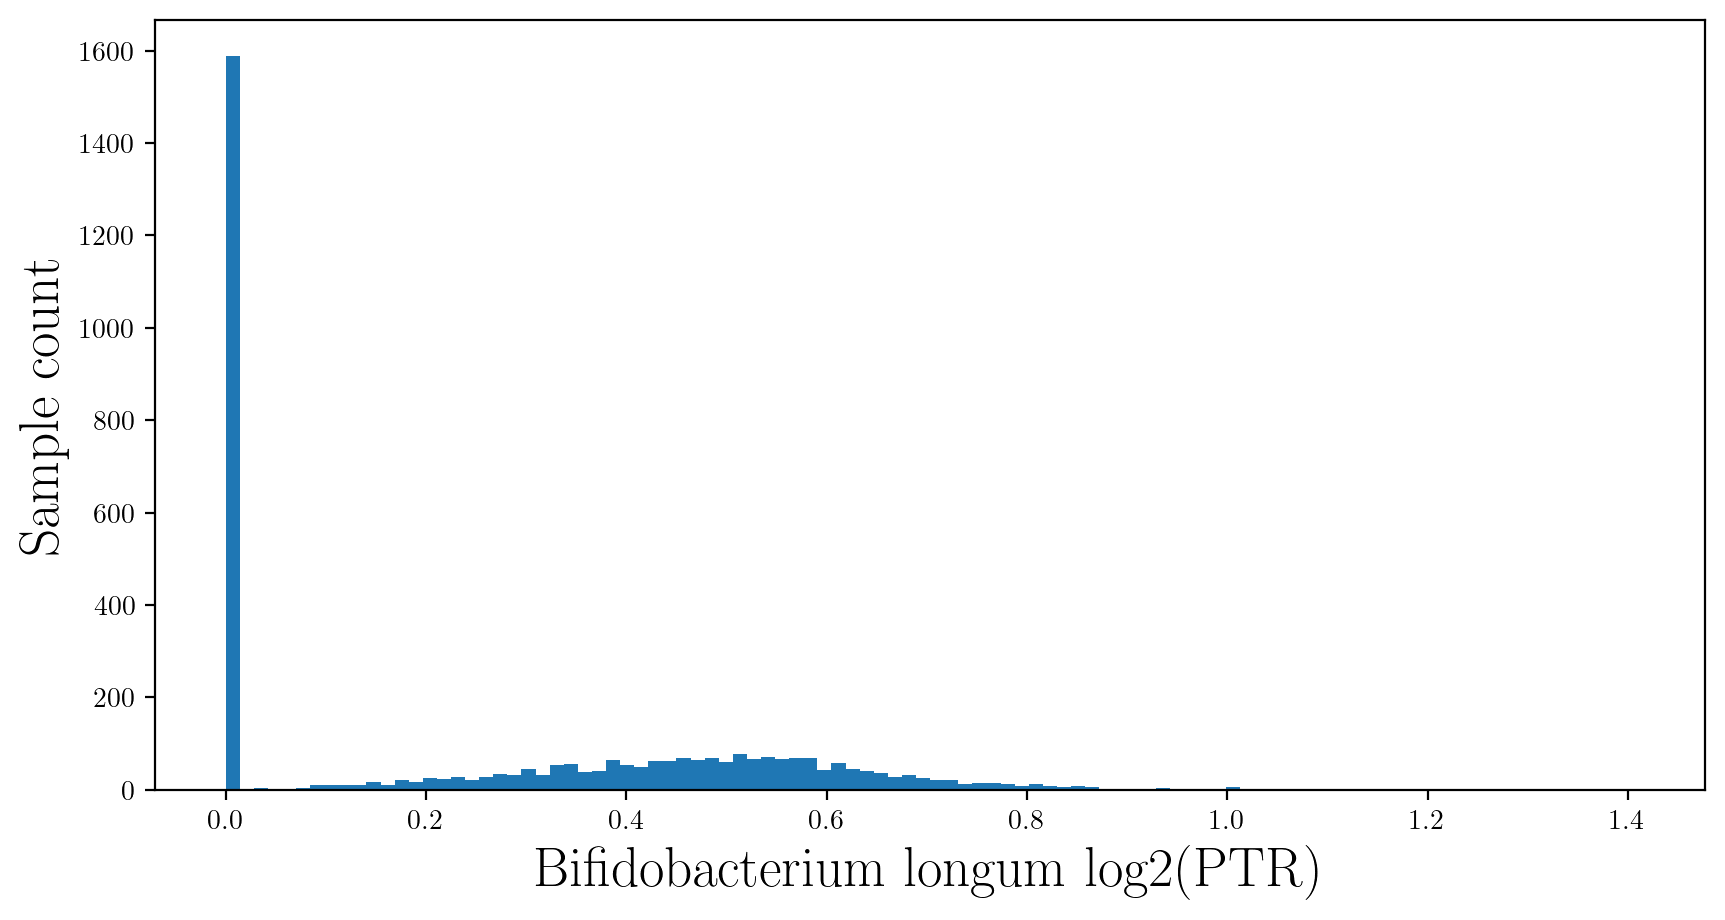

In [33]:
plt.figure(figsize=(10, 5), dpi=200)

concat.loc["d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum"].plot.hist(bins=100)

plt.xlabel("Bifidobacterium longum log2(PTR)", fontsize=20)
plt.ylabel("Sample count", fontsize=20)

In [34]:
concat.loc["d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum"].sort_values()[-30:]

775_S249_R1_001                0.919431
magic_1757_MagAE_S73_R1_001    0.929031
621_S192_R1_001                0.932825
magic_4673_S646_R1_001         0.935560
magic_1761_MagAE_S76_R1_001    0.949825
magic-6585_S240_R1_001         0.954877
871_S252_R1_001                0.959012
magic_0614_S187_R1_001         0.970417
magic_1456_S115_R1_001         0.971729
magic_3879_S509_R1_001         0.977897
magic-6145_S185_R1_001         0.989283
magic_1859_S221_R1_001         0.991027
magic_1761_PE_S42_R1_001       1.002934
magic_1379_S455_R1_001         1.004590
magic_1204_S458_R1_001         1.005729
magic_2578_S353_R1_001         1.006712
magic_1761_PPE_S21_R1_001      1.006765
magic-2668_S94_R1_001          1.017204
magic_2261_S685_R1_001         1.026016
magic_1844_S635_R1_001         1.033882
magic-4008_S289_R1_001         1.052141
magic_3718_S516_R1_001         1.097590
magic_0033_S168_R1_001         1.124119
magic-2869_S158_R1_001         1.136221
magic_2088_S345_R1_001         1.187329


In [35]:
id_to_species[id_to_species["gtdb_taxonomy"] == "d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum"]

,species_id,species_alt_id,species_name,gtdb_taxonomy,operational_taxonomy,count_hgm,count_ref,gut_species,new_species,cultured_species,high_quality
representative_genome,,,,,,,,,,,
890402.3,OTU-01788,261920,Bifidobacterium sp.,d__Bacteria;p__Actinobacteria;c__Actinobacteri...,d__Bacteria;p__23;c__114;o__653;f__1260;g__506...,698,117,Yes,No,Yes,Yes


In [36]:
path = os.path.join(config.RAW_DIR, "estimate-output", "magic_1379_S455_R1_001-890402.3.patric.pdf")
print(path)
# IFrame(path, width=600, height=300)

../data/raw/estimate-output/magic_1379_S455_R1_001-890402.3.patric.pdf


In [37]:
concat

,magic_5171_S42_R1_001,magic_2773_S833_R1_001,magic_1112_S360_R1_001,magic_3408_S376_R1_001,magic_4663_S26_R1_001,814_S250_R1_001,magic_1747_S551_R1_001,magic_1940_S617_R1_001,magic_2228_S696_R1_001,magic_1230_S40_R1_001,...,magic_0142_PPE_S4_R1_001,magic-2529_S68_R1_001,magic_2141_S313_R1_001,magic-3715_S243_R1_001,magic_0797_S205_R1_001,magic-6011_S77_R1_001,ATCC_376_S365_R1_001,magic_4697_S36_R1_001,magic_2462_S727_R1_001,magic_5415_S57_R1_001
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.450138,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.194404,0.000000,0.0,0.291525,0.278157,0,0.000000,0.000000,0.423747,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.270083,0.0000,0.000000
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.411489,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.634047,0,...,0,0.000000,0.499168,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.348290,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.522246,0.307081,0.0,0.580988,0.613101,0,0.474322,1.284002,0.611895,0,...,0,0.047389,0.000000,0.498029,0.365218,0.482592,0,0.478074,0.4406,0.718399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000


In [38]:
concat.columns = [col[:-7] for col in concat.columns]
concat

,magic_5171_S42,magic_2773_S833,magic_1112_S360,magic_3408_S376,magic_4663_S26,814_S250,magic_1747_S551,magic_1940_S617,magic_2228_S696,magic_1230_S40,...,magic_0142_PPE_S4,magic-2529_S68,magic_2141_S313,magic-3715_S243,magic_0797_S205,magic-6011_S77,ATCC_376_S365,magic_4697_S36,magic_2462_S727,magic_5415_S57
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.450138,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.194404,0.000000,0.0,0.291525,0.278157,0,0.000000,0.000000,0.423747,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.270083,0.0000,0.000000
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.411489,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.634047,0,...,0,0.000000,0.499168,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.348290,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.522246,0.307081,0.0,0.580988,0.613101,0,0.474322,1.284002,0.611895,0,...,0,0.047389,0.000000,0.498029,0.365218,0.482592,0,0.478074,0.4406,0.718399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000


In [39]:
import pickle

with open(os.path.join(config.CLEAN_DIR, "filename_to_id"), 'rb') as f:
    filename_to_id = pickle.load(f)

In [40]:
concat = concat[filename_to_id.keys()]
concat

,magic-0001_S22,magic-0004_S34,magic-0011_S46,magic-0013_S58,magic-0015_S70,magic-0016_S82,magic-0017_S94,magic-0018_S106,magic-0020_S23,magic-0021_S35,...,magic-4106_S362,magic-4108_S293,magic-4110_S305,magic-4111_S317,magic-4119_S329,magic-4123_S340,magic-4128_S352,magic-4130_S363,magic-5222_S128,magic-6559_S282
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.573966,0.705745,0.410916,0.000000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.445088
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.0,0.0,0.439616,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.498282,0.530545,0.817352,0.609005,0.582173,0.693301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
concat.columns = [filename_to_id[col] for col in concat.columns]
concat

,magic.0001,magic.0004,magic.0011,magic.0013,magic.0015,magic.0016,magic.0017,magic.0018,magic.0020,magic.0021,...,magic.4106,magic.4108,magic.4110,magic.4111,magic.4119,magic.4123,magic.4128,magic.4130,magic.5222,magic.6559
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.573966,0.705745,0.410916,0.000000,0.000000
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.445088
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.0,0.0,0.439616,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.498282,0.530545,0.817352,0.609005,0.582173,0.693301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
concat = concat[sorted(concat.columns)]
concat

,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.890374,0.000000,0.000000,0.000000,0.000000,0.000000,0.398078,0.000000,0.443034
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.181598,0.000000,0.000000,0.000000,0.153008,0.164560,0.000000,0.181179,0.000000,0.364100
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.531152,0.000000,0.000000,0.000000,0.000000,0.385291,0.339425
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.366896,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.0,0.0,0.0,0.0,0,0.0,0.439616,0.0,0.0,0.0,...,0.000000,0.648231,0.639207,0.000000,0.279416,0.547436,0.706284,0.624992,0.793504,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
concat.to_csv(os.path.join(config.CLEAN_DIR, "ptr.csv"))

In [44]:
concat

,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
gtdb_taxonomy,,,,,,,,,,,,,,,,,,,,,
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus thermophilus,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.890374,0.000000,0.000000,0.000000,0.000000,0.000000,0.398078,0.000000,0.443034
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas;s__Intestinimonas butyriciproducens,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.181598,0.000000,0.000000,0.000000,0.153008,0.164560,0.000000,0.181179,0.000000,0.364100
d__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.531152,0.000000,0.000000,0.000000,0.000000,0.385291,0.339425
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminiclostridium_E;s__Ruminiclostridium_E siraeum,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.366896,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum,0.0,0.0,0.0,0.0,0,0.0,0.439616,0.0,0.0,0.0,...,0.000000,0.648231,0.639207,0.000000,0.279416,0.547436,0.706284,0.624992,0.793504,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia;s__,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__Diaphorobacter;s__Diaphorobacter ebreus,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
gtdb = pd.read_csv(os.path.join(config.CLEAN_DIR, "gtdb_species.tsv"), sep="\t", index_col=0)
gtdb

,k__Archaea;p__Altarchaeota;c__Altarchaeia;o__Altarchaeales;f__Altarchaeaceae;g__Altarchaeum;s__Altarchaeum_sp001873845,k__Archaea;p__Asgardarchaeota;c__Heimdallarchaeia;o__LC-3;f__B3-JM-08;g__B3-JM-08;s__B3-JM-08_sp003144275,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haladaptataceae;g__Haladaptatus;s__Haladaptatus_sp003298465,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haloferacaceae;g__Halobellus;s__Halobellus_sp003665925,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haloferacaceae;g__Halobellus;s__Halobellus_sp003665935,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haloferacaceae;g__Haloferax;s__Haloferax_larsenii,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haloferacaceae;g__Haloquadratum;s__Haloquadratum_walsbyi,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Haloferacaceae;g__Halorubrum;s__Halorubrum_sp003666015,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Natrialbaceae;g__Halobiforma;s__Halobiforma_nitratireducens,k__Archaea;p__Halobacteriota;c__Halobacteria;o__Halobacteriales;f__Natrialbaceae;g__Natrinema;s__Natrinema_pallidum,...,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia_sp900545155,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__UBA1315;s__UBA1315_sp004294095,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__UBA956;s__UBA956_sp002293145,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;s__Prosthecobacter_debontii,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;s__Prosthecobacter_sp002279765,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;s__Prosthecobacter_sp002336895,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;s__Prosthecobacter_sp003453085,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Verrucomicrobium;s__Verrucomicrobium_spinosum,k__Bacteria;p__WOR-3;c__32-111;o__32-111;f__32-111;g__32-111;s__32-111_sp001508335,k__Bacteria;p__WOR-3;c__Hydrothermia;o__LBFQ01;f__LBFQ01;g__Caldipriscus;s__Caldipriscus_sp000980735
magic.0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.0007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.6597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.6598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
magic.6599,0,0,0,0,0,0,0,0,0,0,...,204,0,0,0,0,0,0,0,0,0


In [46]:
for ind in sorted(concat.index):
    print(ind)

d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces_B;s__
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinotignum;s__Actinotignum schaalii
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium angulatum
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium animalis
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium bifidum
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium breve
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium longum
d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;

In [47]:
for col in sorted(gtdb.columns):
#     print(col)
    pass

Text(0, 0.5, 'Sample count')

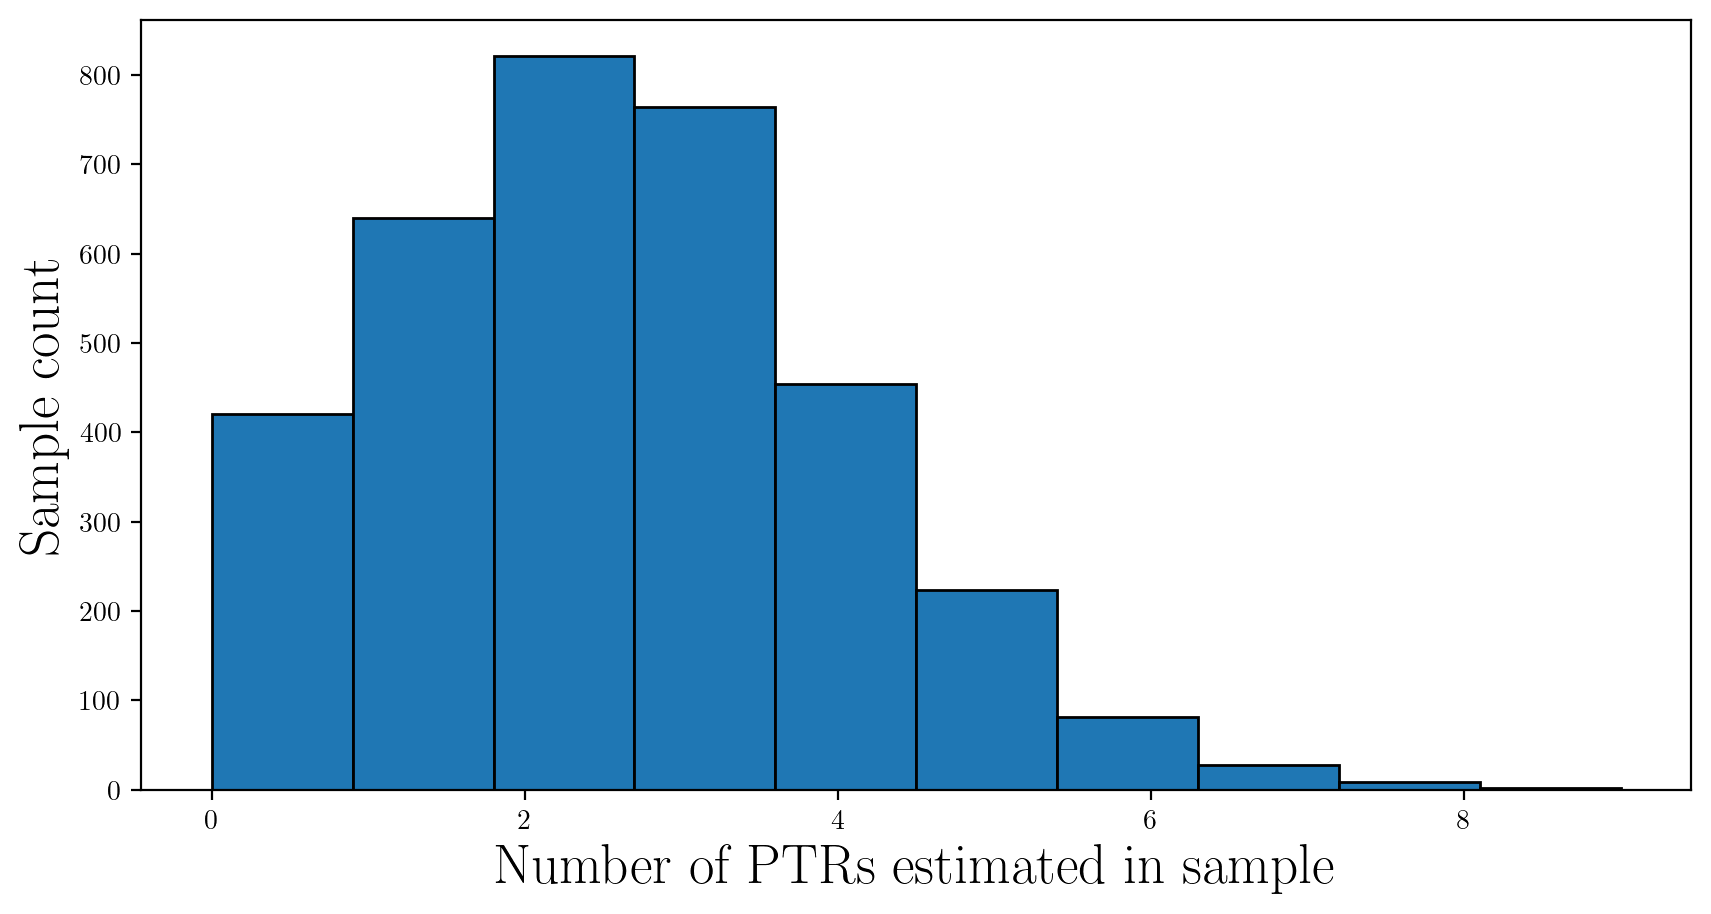

In [48]:
plt.figure(figsize=(10, 5), dpi=200)

(concat > 0).sum().plot.hist(edgecolor="black")

plt.xlabel("Number of PTRs estimated in sample", fontsize=20)
plt.ylabel("Sample count", fontsize=20)